# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.api as sm
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel = pd.read_csv('INNHotelsGroup.csv')
data = hotel.copy()

NameError: name 'pd' is not defined

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.shape

(36275, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
data.duplicated()
print((data.duplicated() == True).sum())

0


In [ ]:
data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
data['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [ ]:
data['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [ ]:
data['Booking_ID'].nunique()
# There are 36275 bookings in the data set. Beacuse there are also 36275 unique booking id this means that there are no repeat customers in the data set.

36275

In [ ]:
data['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

There are 36,275 bookings in the data set. There are no empty or duplicate entries, but several of the categories are 'object' entries so I will create dummie variables in a new data set (so that the original remains unchanged), in order to properly analyze the data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

,arrival_month
10,5317
9,4611
8,3813
6,3203
12,3021
11,2980
7,2920
4,2736
5,2598
3,2358


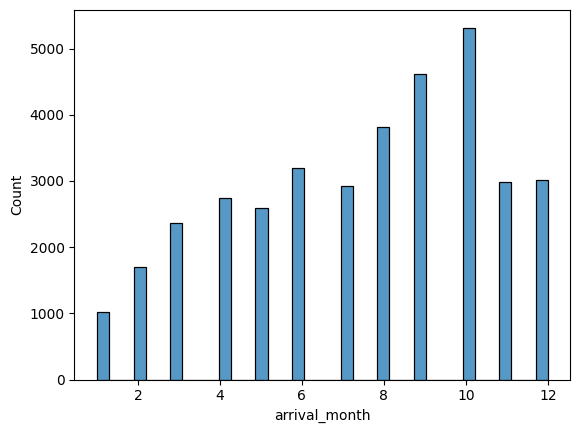

In [ ]:
df = data.copy()
df.drop(['Booking_ID'], axis = 1)

sns.histplot(df, x='arrival_month')
df['arrival_month'].value_counts()
#The busiest months for bookings for the hotel were in the fall/early winter,  with the most being October and September, and the least being in the winter such as January and Febuary

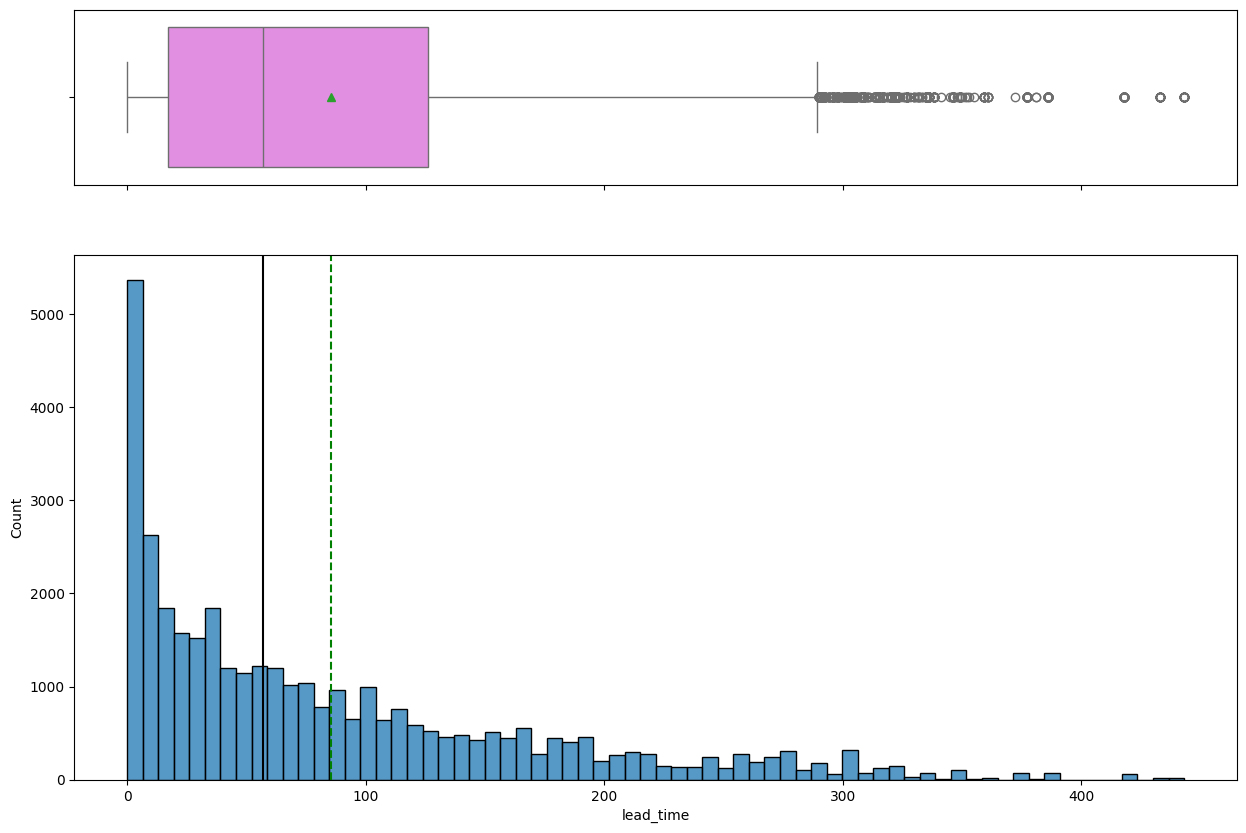

In [ ]:
histogram_boxplot(df,'lead_time')
# The average lead time before the booking is about 60 days.

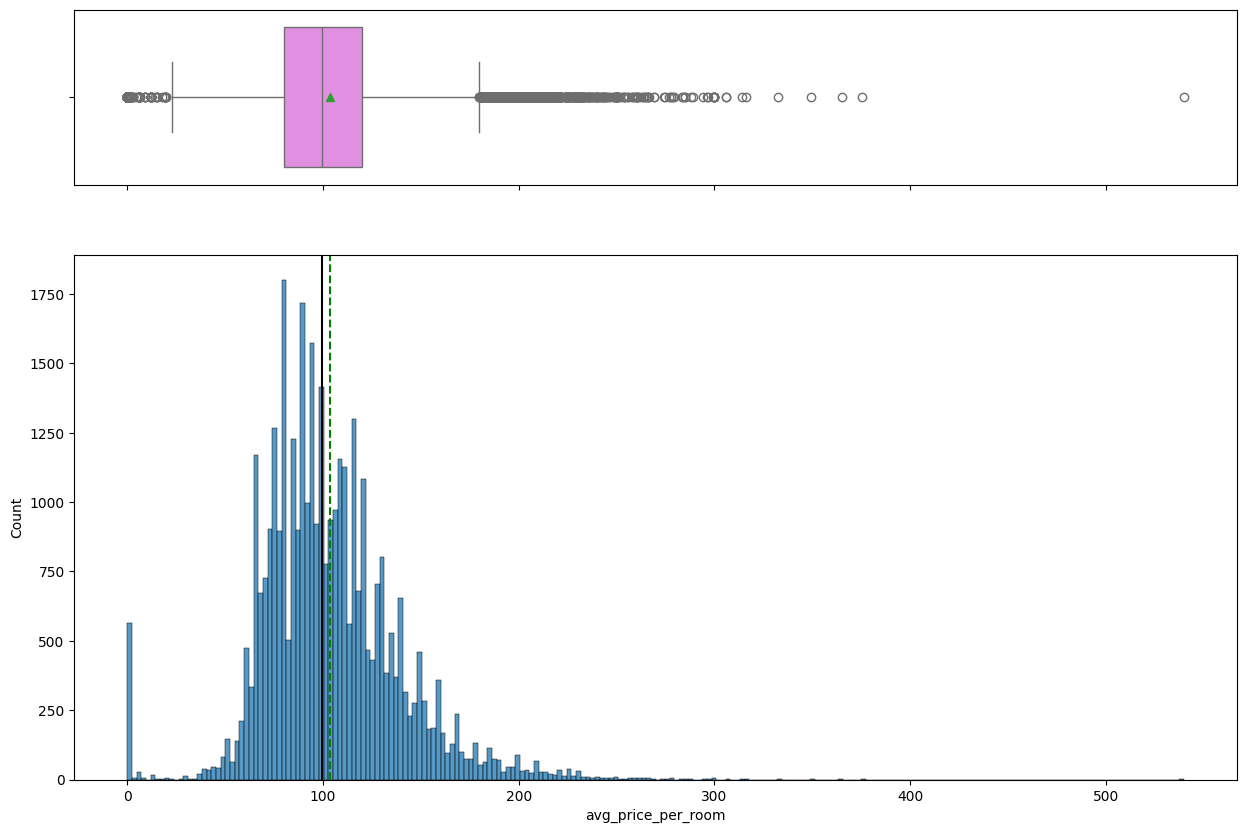

In [ ]:
histogram_boxplot(df, 'avg_price_per_room')
# Average pric eper room has many outliers, so I will replace these outliers with the value of the upper whisker.

In [ ]:
Q1 = data["avg_price_per_room"].quantile(0.25)
Q3 = data["avg_price_per_room"].quantile(0.75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + 1.5 * IQR
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

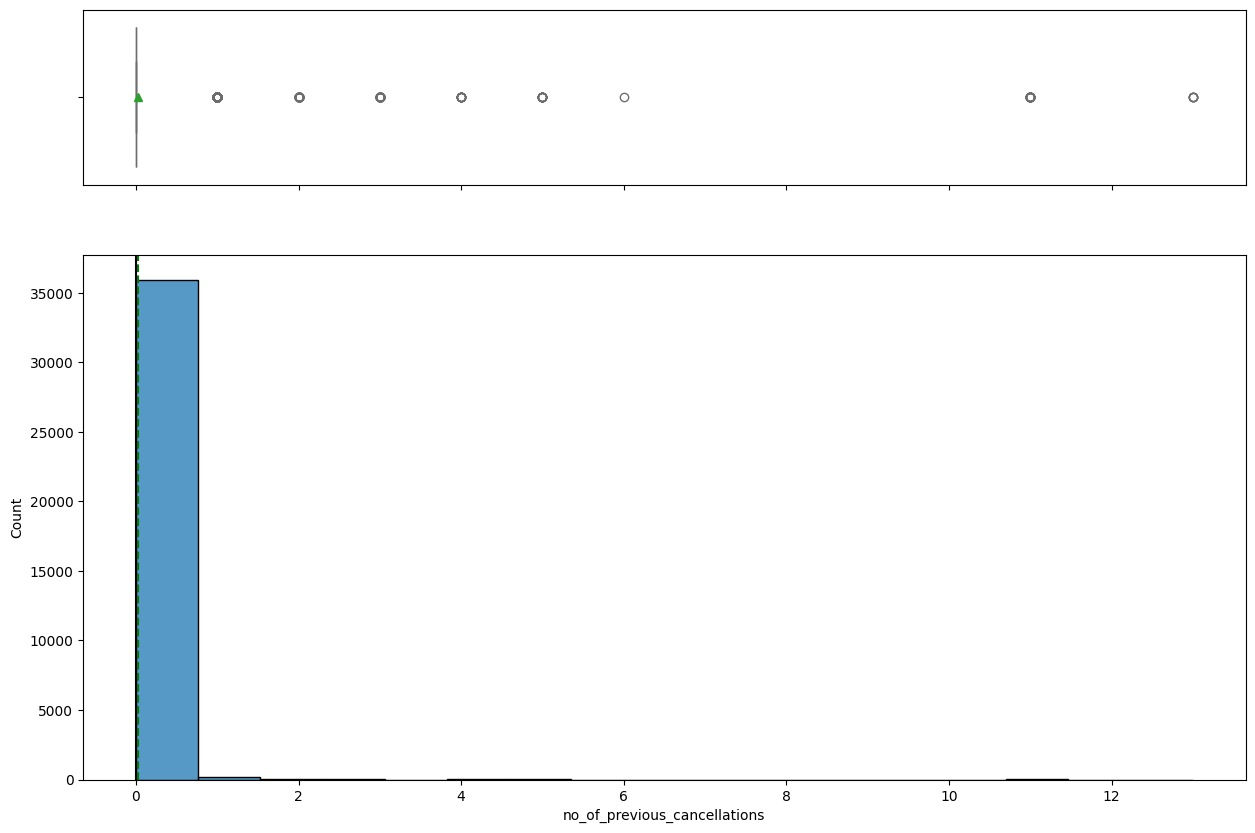

In [ ]:
histogram_boxplot(df, 'no_of_previous_cancellations')
# Most people have 0 previous cancellations

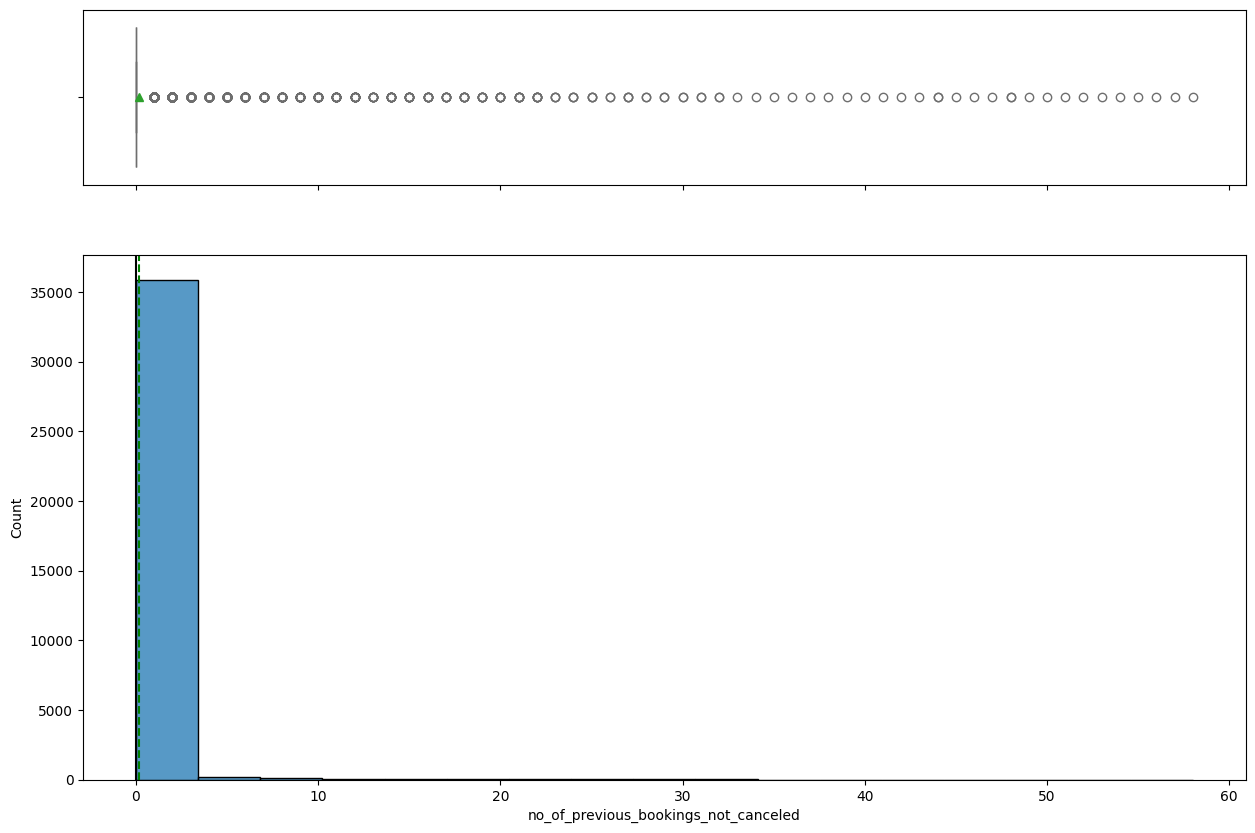

In [ ]:
histogram_boxplot(df, 'no_of_previous_bookings_not_canceled')
# Most people have 0 previous bookings not canceled

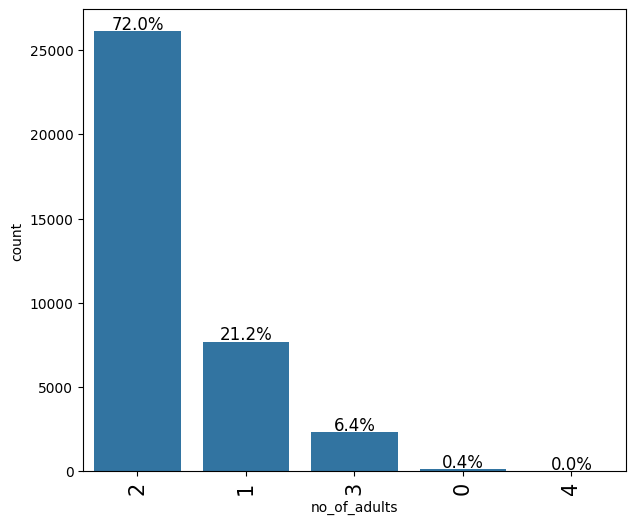

In [ ]:
labeled_barplot(df, "no_of_adults", perc=True)

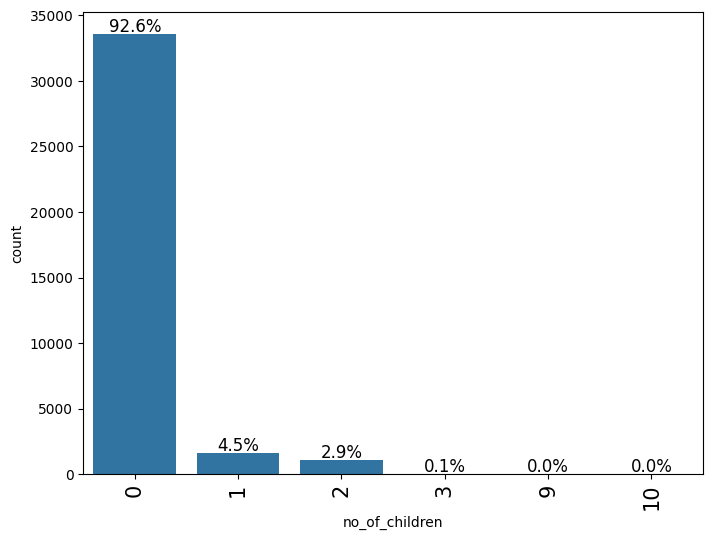

In [ ]:
labeled_barplot(df, "no_of_children", perc=True)
# Less than 0.01$ of people brought 9 or 10 children, so I will group these bookings with the people that have 3 children in their booking

In [ ]:
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

<Axes: xlabel='market_segment_type', ylabel='Count'>

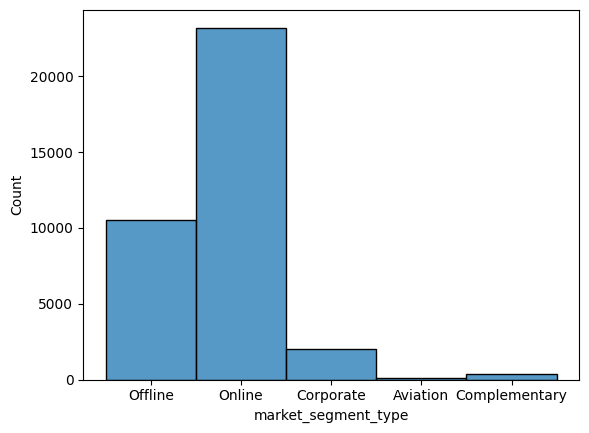

In [ ]:
sns.histplot(df, x='market_segment_type')
#Most of the guests come from Online Travel Agents, and the least come from aviation

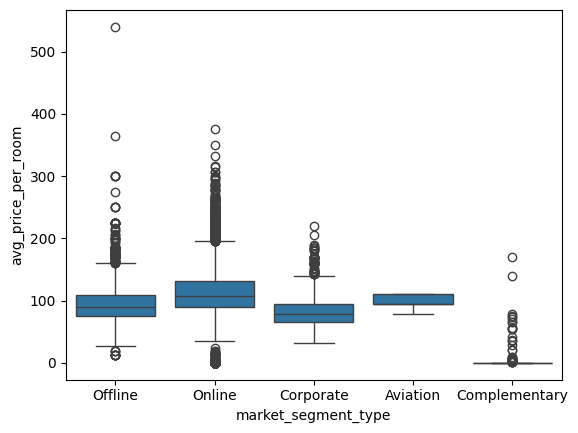

In [ ]:
sns.boxplot(data=df,x='market_segment_type',y='avg_price_per_room')
plt.show()

In [ ]:
summary_df = df.groupby(['market_segment_type', 'room_type_reserved'])['avg_price_per_room'].mean()
summary_df
# The difference in room price by marketing segment is as follows:
# The price of type 1 rooms are highest when the marketing segment is online.
# The price of type 2 rooms are highest when the marketing segment is online.
# The price of type 3 rooms are highest when the marketing segment is corporate.
# The price of type 4 rooms are highest when the marketing segment is online.
# The price of type 5 rooms are highest when the marketing segment is offline.
# The price of type 6 rooms are highest when the marketing segment is online.
# The price of type 7 rooms are highest when the marketing segment is online.

# Based on these findings, it seems that rooms that are marketed through the online segment are more expensive.

market_segment_type  room_type_reserved
Aviation             Room_Type 1            94.166667
                     Room_Type 4           106.738462
Complementary        Room_Type 1             4.064089
                     Room_Type 2             0.080000
                     Room_Type 3             0.000000
                     Room_Type 4             2.038462
                     Room_Type 5             6.823529
                     Room_Type 6             0.000000
                     Room_Type 7             0.025641
Corporate            Room_Type 1            80.458532
                     Room_Type 2            68.125000
                     Room_Type 3           110.000000
                     Room_Type 4            97.765354
                     Room_Type 5           119.572973
                     Room_Type 6           114.690000
                     Room_Type 7           127.000000
Offline              Room_Type 1            91.532636
                     Room_Type 2            86.342982
                     Room_Type 3            97.500000
                     Room_Type 4            85.462463
                     Room_Type 5           138.002099
                     Room_Type 6           137.731739
                     Room_Type 7           137.840000
Online               Room_Type 1           101.698294
                     Room_Type 2            90.916476
                     Room_Type 3           105.375000
                     Room_Type 4           131.934587
                     Room_Type 5           135.987527
                     Room_Type 6           186.291253
                     Room_Type 7           212.808532
Name: avg_price_per_room, dtype: float64

<Axes: >

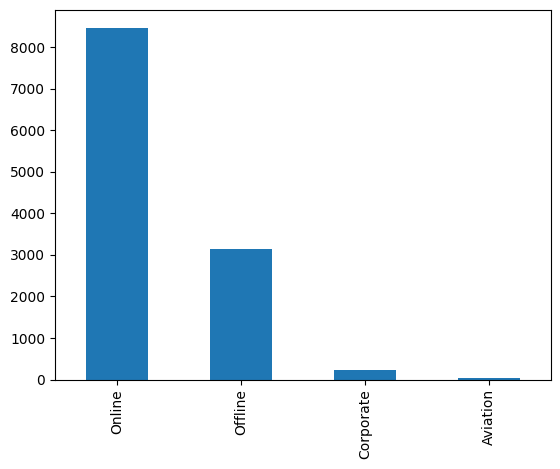

In [ ]:
df[df['booking_status'] == 'Canceled']['market_segment_type'].value_counts().plot(kind='bar')
# The histogram below shows, by far, that the most number of cancelations come from online market segment types.
# It is worth noting that online also has the highest number of bookings in total so this may not be the best way to find which marketing type has the highest cancelation rate

In [ ]:
percent_cancelled = (
    df.groupby('market_segment_type')['booking_status']
    .apply(lambda x: (x == 'Canceled').mean() * 100)
)

print(percent_cancelled)

# The table below shows a more accurate evaluation of the marketing types that result in the most cancelations.
# Again, the highest is still Online, and not shockingly, complementary bookings are never canceled in this data set.

market_segment_type
Aviation         29.600000
Complementary     0.000000
Corporate        10.907288
Offline          29.948708
Online           36.508142
Name: booking_status, dtype: float64


In [ ]:
canceled_pct = (df['booking_status'] == 'Canceled').mean() * 100
print(f"Percentage of canceled bookings: {canceled_pct:.2f}%")

Percentage of canceled bookings: 32.76%


In [ ]:
#data frame of repeated guests
repeated_guests = df[df['repeated_guest'] == 1]
cancelled_pct = (repeated_guests['booking_status'] == 'Canceled').mean() * 100
print(f"Percentage of repeated guests who canceled: {cancelled_pct:.2f}%")
# The percent of repeat guests that canceled is significantly lower than the total number of canceled bookings.
#This shows that if a guest is a repeat cutomer, they are less likely to cancel their booking.

Percentage of repeated guests who canceled: 1.72%


In [ ]:
# Group by number of special requests, and calculate mean cancellation rate
cancelation_by_requests = df.groupby('no_of_special_requests')['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)

cancelation_by_requests = cancelation_by_requests.reset_index()
cancelation_by_requests.columns = ['no_of_special_requests', 'cancelation_percentage']

print(cancelation_by_requests)

#Interestingly, the percentage of cancelations declines when the number of special requests increases.
#Meaning that when 0 special requests are made, the most number of booking cancelations occurs. Adding on, when 3 or more special requests are made, no cancelations are made.

   no_of_special_requests  cancelation_percentage
0                       0               43.206755
1                       1               23.766816
2                       2               14.596700
3                       3                0.000000
4                       4                0.000000
5                       5                0.000000


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
df.isnull().sum()
# There are missing values in the data

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
# Feature Engineering
df['room_type_reserved'] = df['room_type_reserved'].astype(object).replace({
    'Room_Type 1': 1,
    'Room_Type 2': 2,
    'Room_Type 3': 3,
    'Room_Type 4': 4,
    'Room_Type 5': 5,
    'Room_Type 6': 6,
    'Room_Type 7': 7
}).astype(int)

df['type_of_meal_plan'] = df['type_of_meal_plan'].astype(object).replace({
    'Not Selected': 0,
    'Meal Plan 1': 1,
    'Meal Plan 2': 2,
    'Meal Plan 3': 3
}).astype(int)

df['market_segment_type'] = df['market_segment_type'].astype(object).replace({
    'Online': 1,
    'Offline': 2,
    'Corporate': 3,
    'Aviation': 4,
    'Complementary': 5
}).astype(int)

df['booking_status'] = df['booking_status'].astype(object).replace({
    'Not_Canceled': 0,
    'Canceled': 1
}).astype(int)

df.rename(columns={'booking_status': 'canceled'}, inplace=True)

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,canceled
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  int64  
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  int64  
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

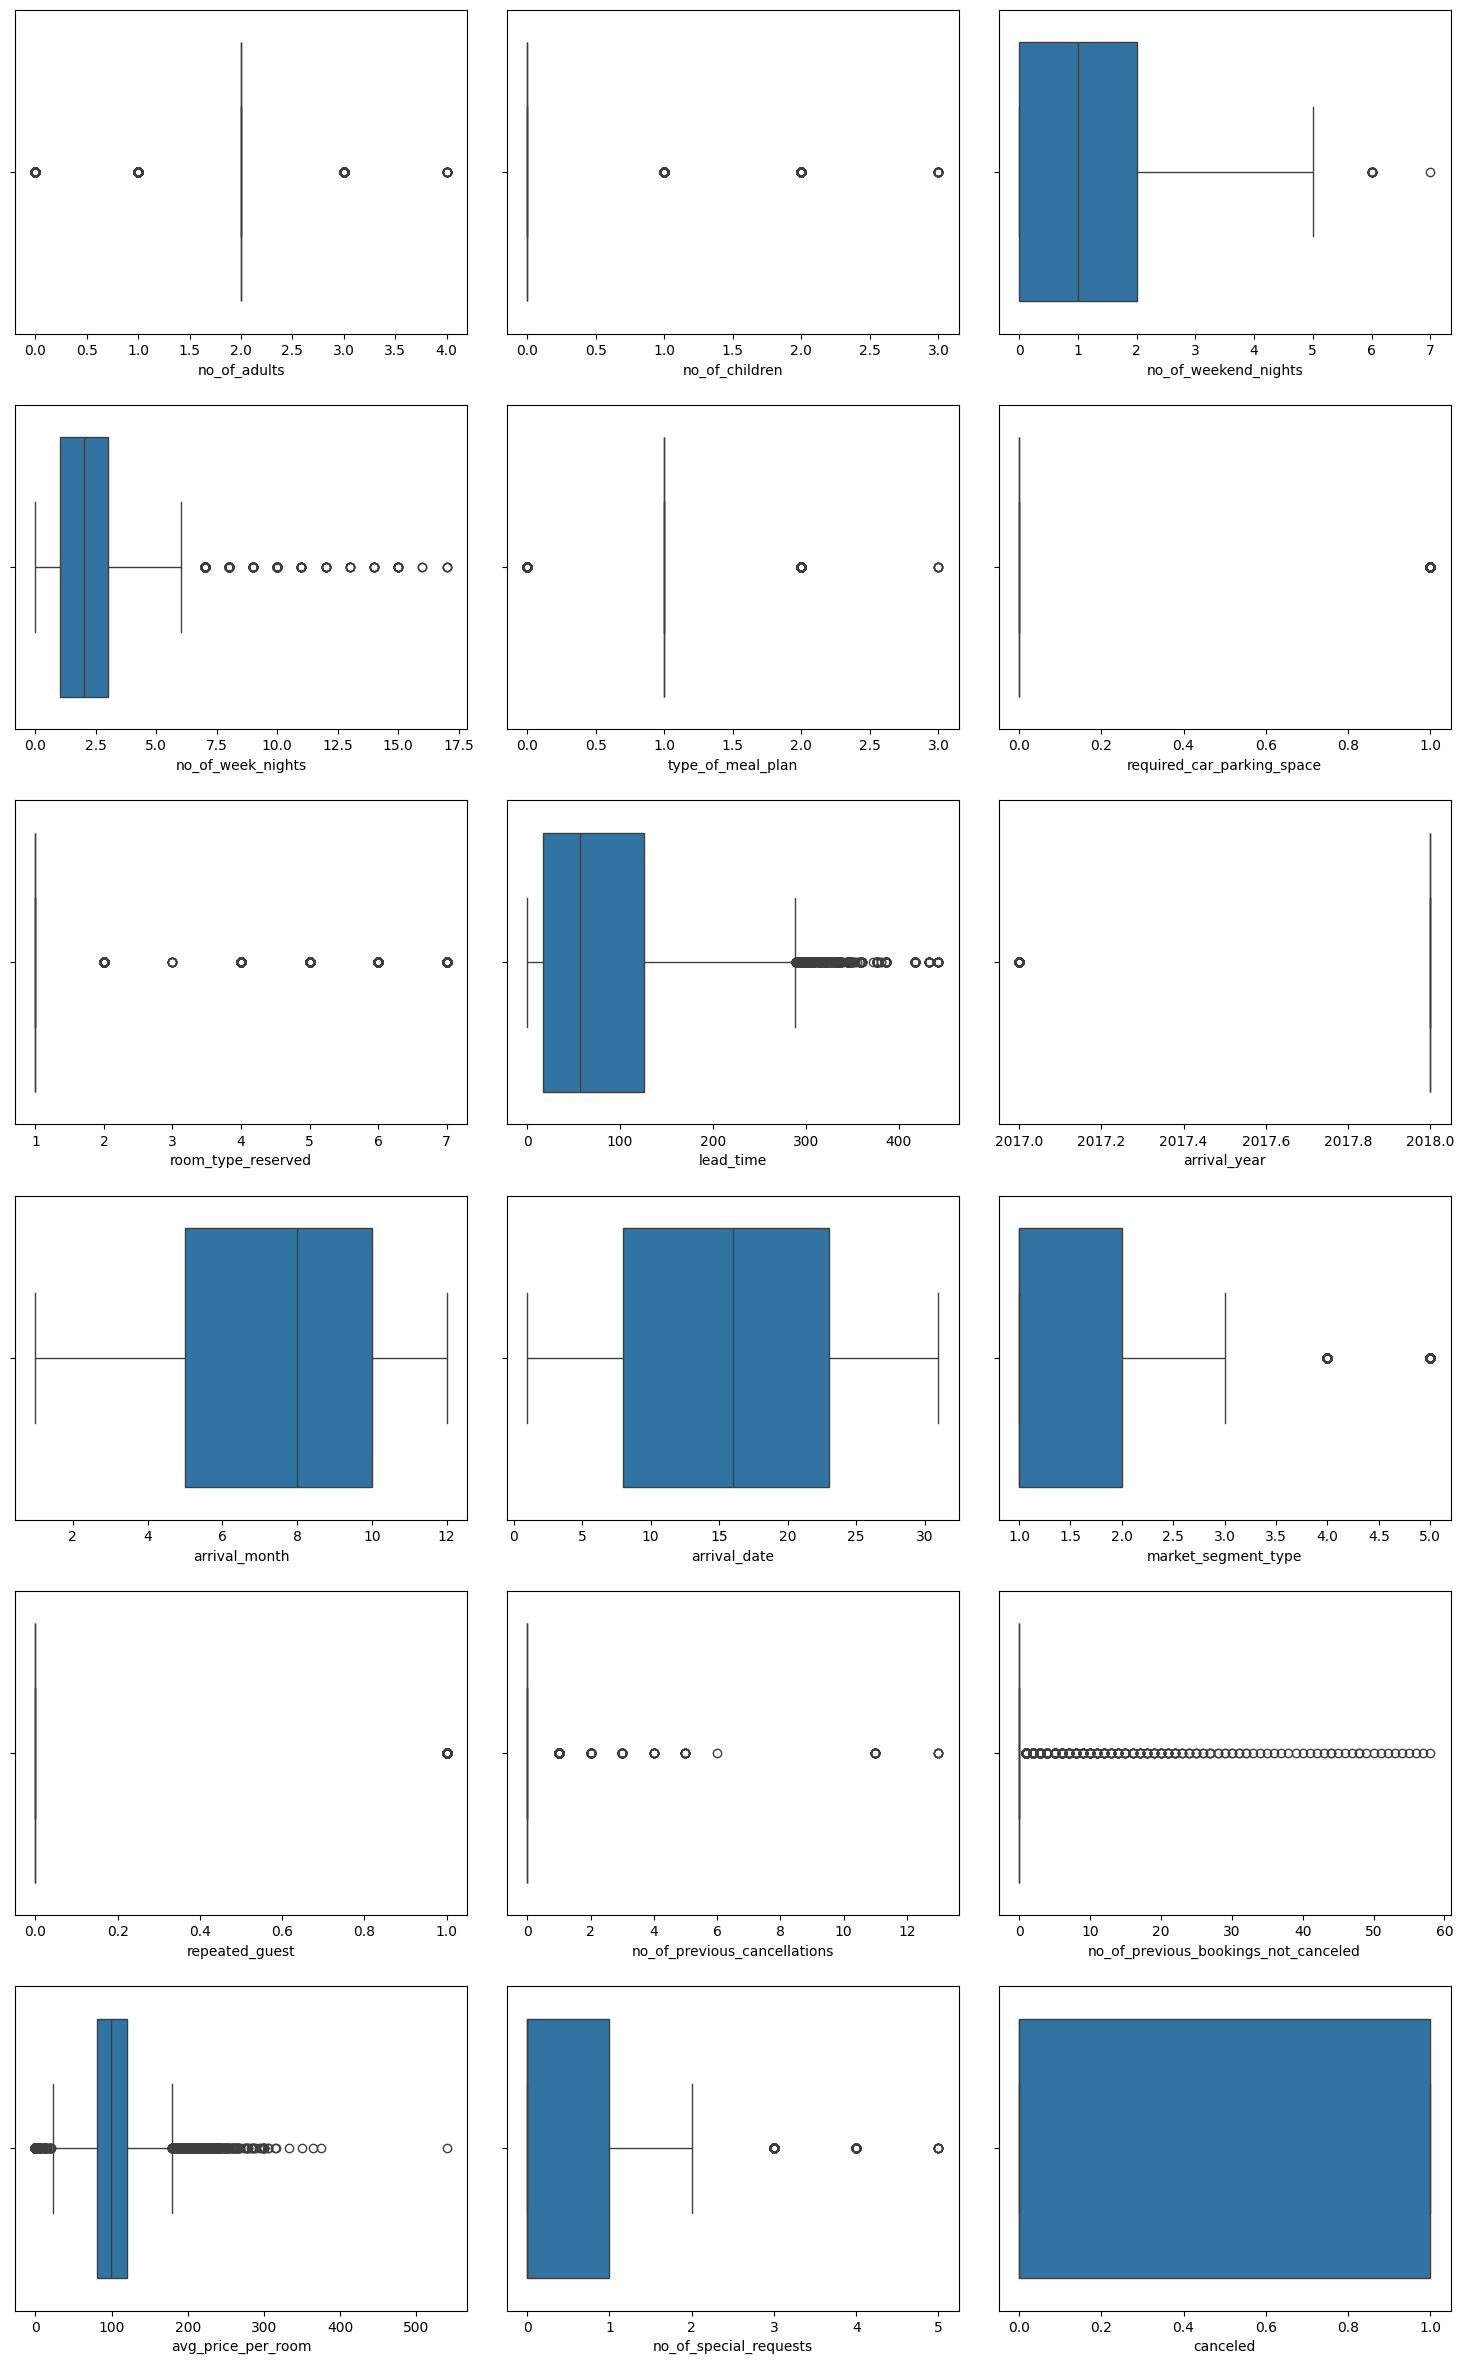

In [ ]:
# Outlier Detection
num_cols = df.select_dtypes(include=np.number).columns.tolist()

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, variable in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

# Several of the columns in the set have outliers, but I will keep them for the purpose of this study.

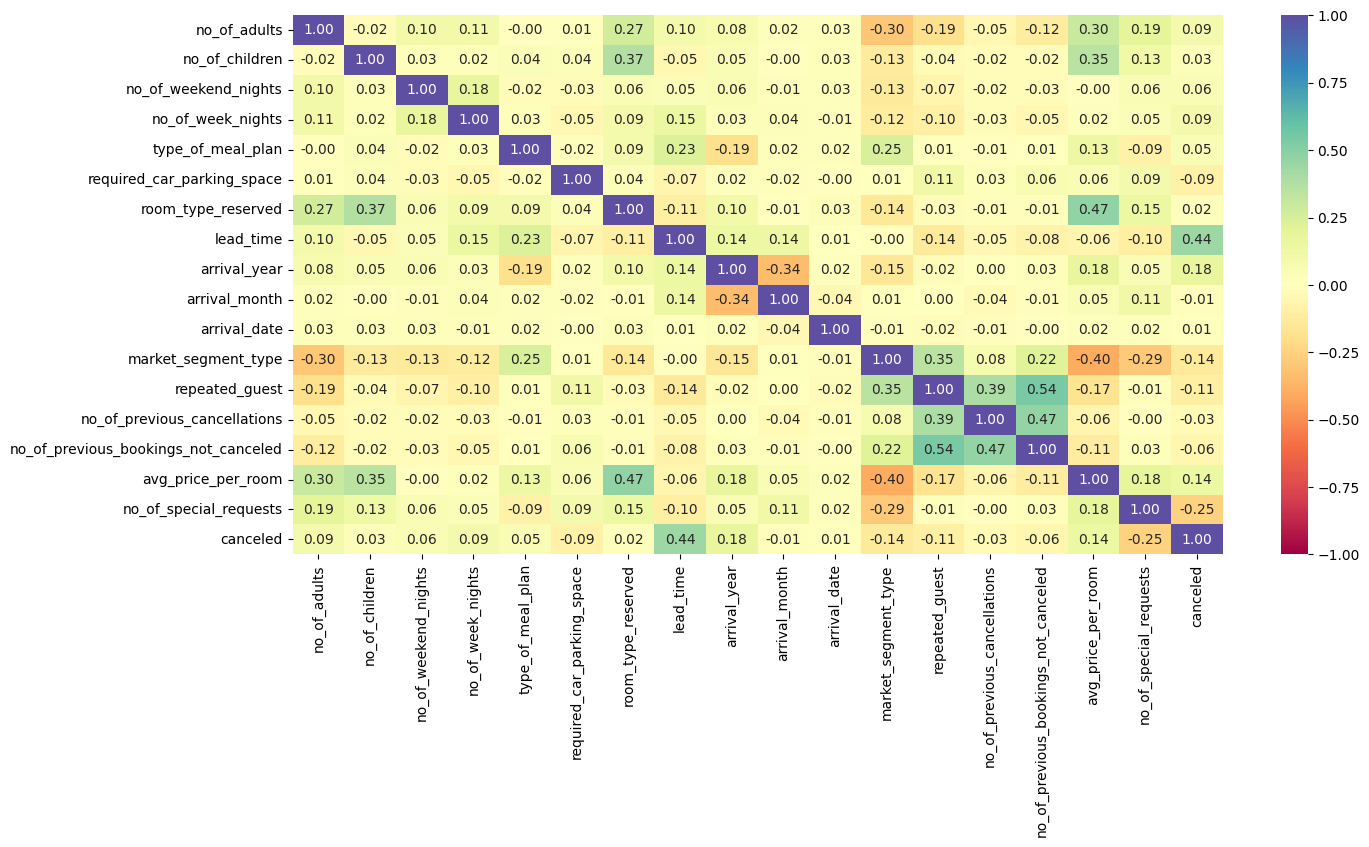

In [ ]:
#Correlation Check
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#The 'canceled' column now holds a 1 if the booking was canceled.
#The Heat map below shows that 'lead_time' and 'canceled' have the strongest positive correlation
#and number of special requests have the strongest negative correlation in respect to if the current booking is canceled.

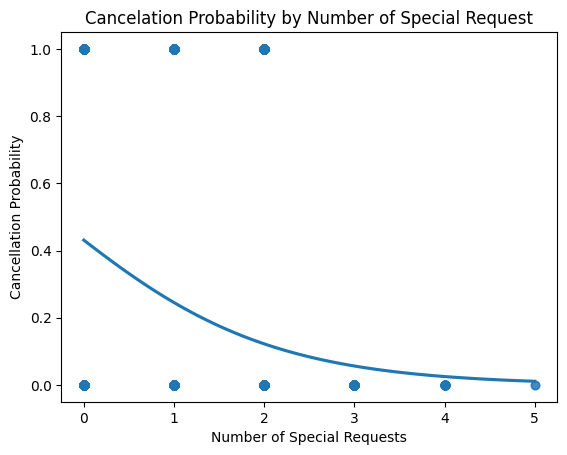

In [ ]:
sns.regplot(data=df, x='no_of_special_requests', y='canceled', logistic=True, ci=None, scatter_kws={'alpha': 0.2})
plt.title('Cancelation Probability by Number of Special Request')
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Probability')
plt.show()
# The below regression curve shows the negative correlation between the number of special requests made and the probability of the booking being canceled.
# It is safe to assume that the more special requests made by the customer booking, the less likely they are to cancel.

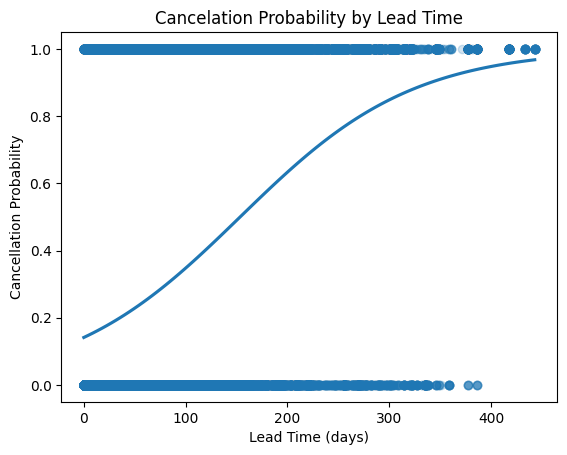

In [ ]:
sns.regplot(data=df, x='lead_time', y='canceled', logistic=True, ci=None, scatter_kws={'alpha': 0.2})
plt.title('Cancelation Probability by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Probability')
plt.show()
# The graph below shows the positive correlation between the number of lead days before the booking and the probability of cancelling.
# It is safe to assume that a booking has a higher chance of being canceled if the booking is made father away.

In [ ]:
# Model Preperation
X = df.drop(['canceled', 'Booking_ID'], axis=1)
y = df[['canceled']]

print('X: \n')
print(X.head())
print()
print()
print('y: \n')
print(y.head())

X: 

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  1                           0                   1   
1                  0                           0                   1   
2                  1                           0                   1   
3                  1                           0                   1   
4                  0                           0                   1   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        224          201

In [ ]:
X = sm.add_constant(X)

# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
x_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
13662,1.0,1,0,0,1,1,0,1,163,2018,10,15,2,0,0,0,115.00,0
26641,1.0,2,0,0,3,1,0,2,113,2018,3,31,1,0,0,0,78.15,1
17835,1.0,2,0,2,3,1,0,1,359,2018,10,14,2,0,0,0,78.00,1
21485,1.0,2,0,0,3,0,0,1,136,2018,6,29,1,0,0,0,85.50,0
5670,1.0,2,0,1,2,1,0,1,21,2018,8,15,1,0,0,0,151.00,0


In [ ]:
x_test.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
30392,1.0,1,0,1,0,0,0,1,53,2018,9,11,1,0,0,0,94.32,0
6685,1.0,2,0,1,2,1,0,1,63,2018,4,22,1,0,0,0,105.30,1
8369,1.0,2,0,2,3,1,0,4,55,2018,9,11,1,0,0,0,106.24,0
2055,1.0,2,0,0,2,0,0,1,53,2017,12,29,1,0,0,0,81.00,1
10969,1.0,1,0,2,4,1,0,1,245,2018,7,6,2,0,0,0,110.00,0


In [ ]:
y_train.head()

,canceled
13662,1
26641,0
17835,0
21485,1
5670,1


In [ ]:
y_test.head()

,canceled
30392,0
6685,1
8369,0
2055,0
10969,1


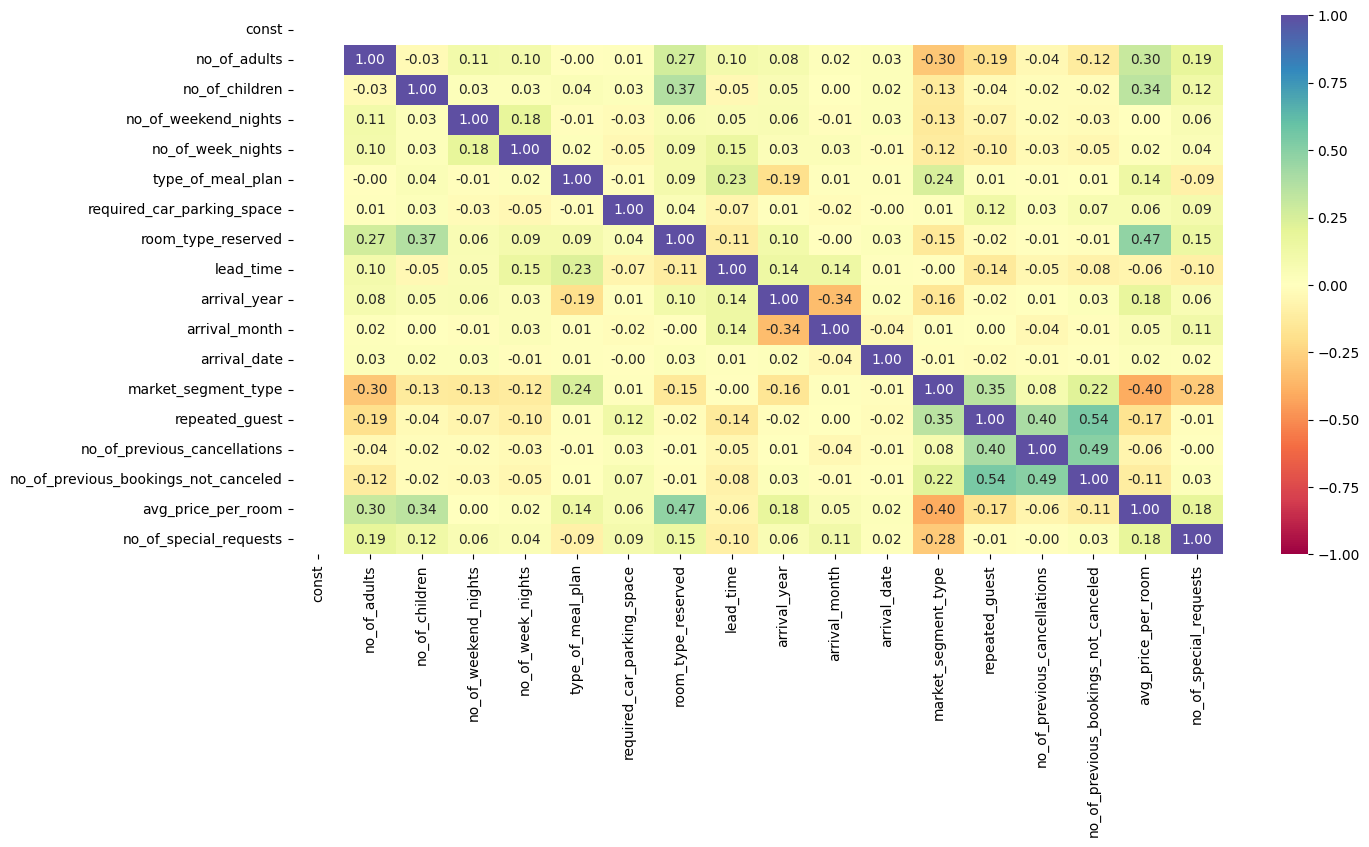

In [ ]:
#Correlation Check
cols_list = x_train.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    x_train[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

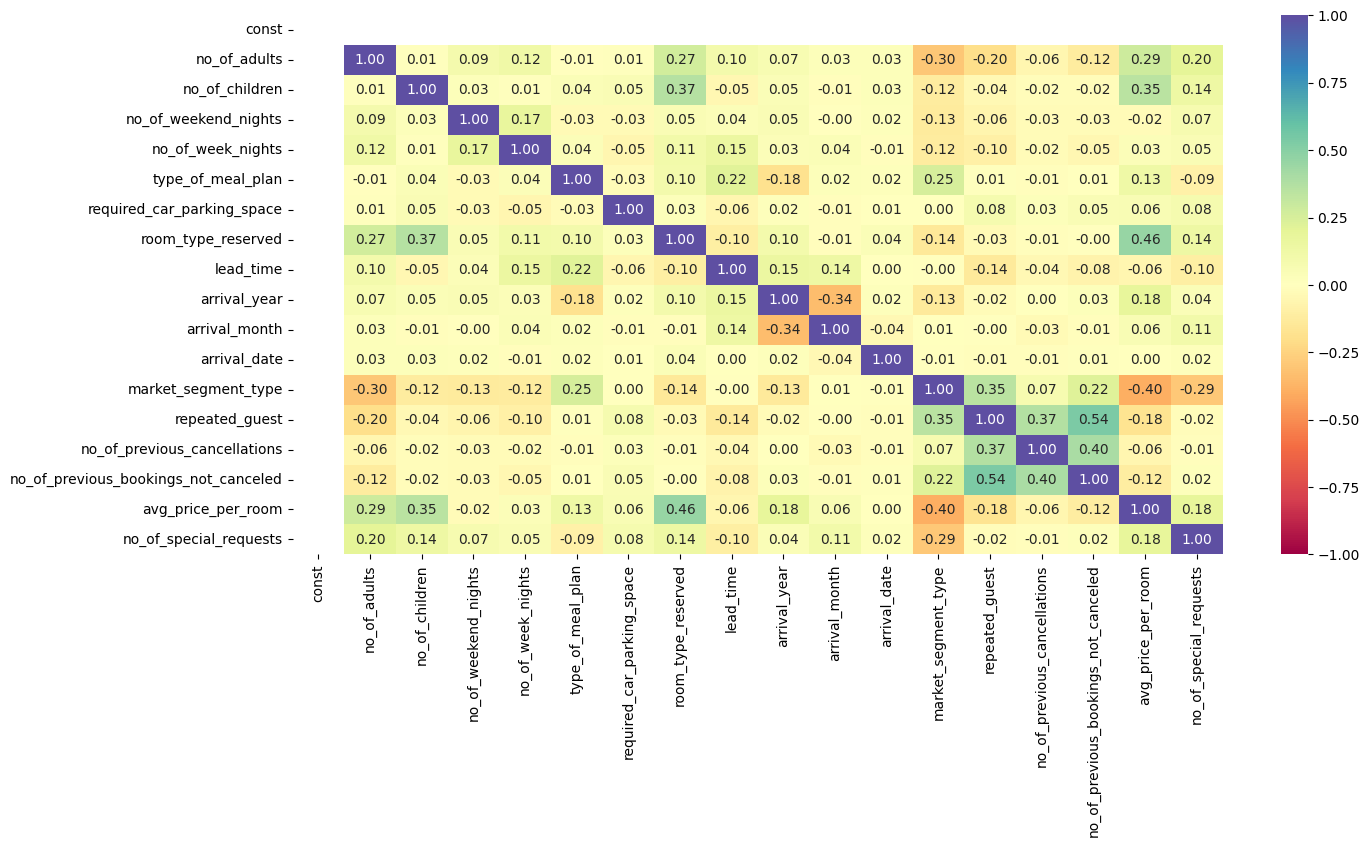

In [ ]:
#Correlation Check
cols_list = x_test.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    x_test[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
# Function to check VIF.
x_train_numeric = x_train.select_dtypes(include=np.number)
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

checking_vif(x_train_numeric)

# There is not multicollinearity in this data set, so no treatement is required.

,feature,VIF
0,const,3.853831e+07
1,no_of_adults,1.294359e+00
2,no_of_children,1.275477e+00
3,no_of_weekend_nights,1.064728e+00
4,no_of_week_nights,1.083416e+00
5,type_of_meal_plan,1.357580e+00
6,required_car_parking_space,1.034359e+00
7,room_type_reserved,1.499814e+00
8,lead_time,1.313922e+00
9,arrival_year,1.397166e+00


## Building a Logistic Regression model

In [ ]:
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.436400
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:               canceled   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Sun, 25 May 2025   Pseudo R-squ.:                  0.3114
Time:                        16:16:24   Log-Likelihood:                -11081.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1057.0487    117.

In [ ]:
#Remove high p-values if necessary
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

# The number of children, number of adults, arrival date, number if previous cancellations and number of previous reservations not cancelled did not significantly impact the cancellation probabiolity, so they will be dropped

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'avg_price_per_room', 'no_of_special_requests']


In [ ]:
x_train1 = x_train[selected_features]
x_test1 = x_test[selected_features]

In [ ]:
logit = sm.Logit(y_train, x_train1.astype(float))
lg1 = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.436570
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               canceled   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Sun, 25 May 2025   Pseudo R-squ.:                  0.3114
Time:                        16:16:26   Log-Likelihood:                -11081.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1057.0487    117.

## Model performance evaluation

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to checky_ regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1,x_train1, y_train)
# The model predicts if a customer is likely to cancel their booking correctly 73.9% of the time

Training performance:


,Accuracy,Recall,Precision,F1
0,0.802103,0.616406,0.739386,0.672318


In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train1.columns).T

,const,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
Odds,0.0,1.116476,1.046804,0.806334,0.225501,0.904808,1.014405,1.681581,0.959485,0.302224,0.282099,1.019492,0.256792
Change_odd%,-100.0,11.647635,4.680368,-19.366620,-77.449925,-9.519157,1.440490,68.158058,-4.051546,-69.777570,-71.790105,1.949195,-74.320758


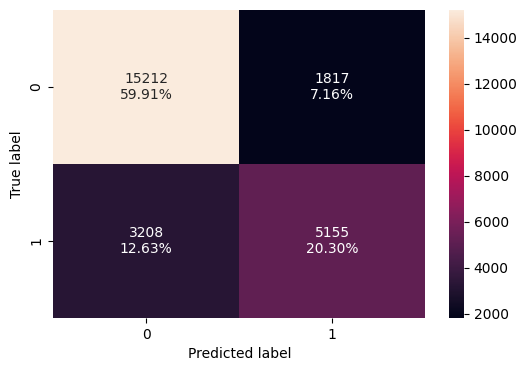

In [ ]:
confusion_matrix_statsmodels(lg1, x_train1, y_train)

## Final Model Summary

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train1) ## Complete the code to fit the final model
olsres_final = olsmodel_final.fit()
print(olsres_final.summary())

                            OLS Regression Results                            
Dep. Variable:               canceled   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     956.8
Date:                Sun, 25 May 2025   Prob (F-statistic):               0.00
Time:                        16:16:34   Log-Likelihood:                -12119.
No. Observations:               25392   AIC:                         2.426e+04
Df Residuals:                   25379   BIC:                         2.437e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

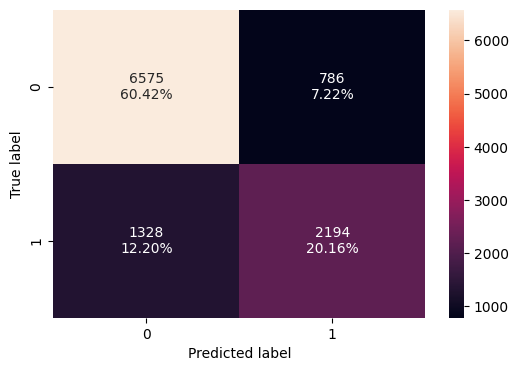

In [ ]:
# Testing the model on the testing sets
confusion_matrix_statsmodels(lg1, x_test1, y_test) ## Complete the code to create confusion matrix for X_test1 and y_test

## Building a Decision Tree model

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train1, y_train)

DecisionTreeClassifier(random_state=1)

## Do we need to prune the tree?

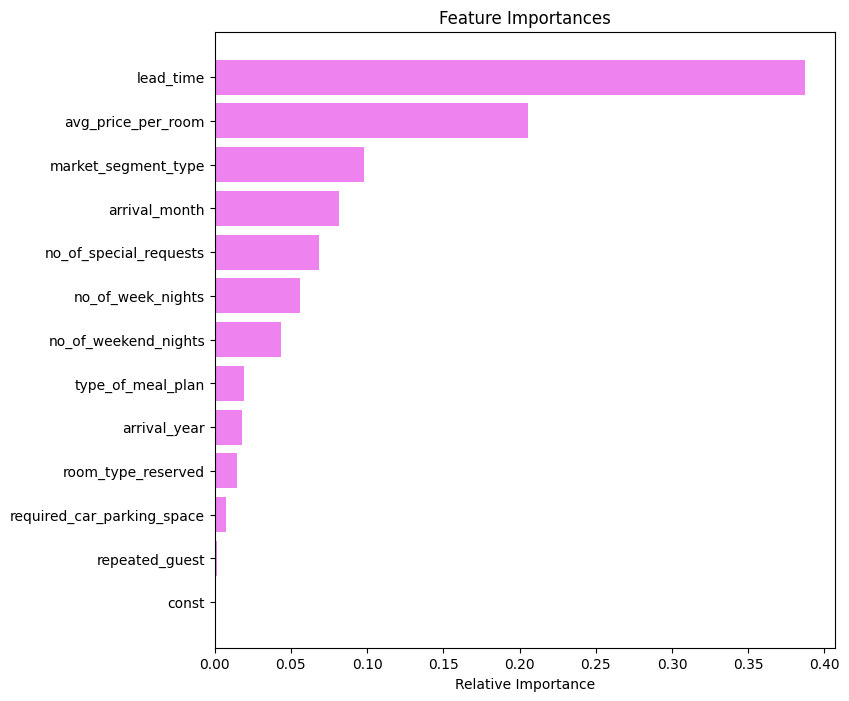

In [ ]:
feature_names = list(x_train1.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Interestingly enough, whether

In [ ]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train1, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train1, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=30, random_state=1)

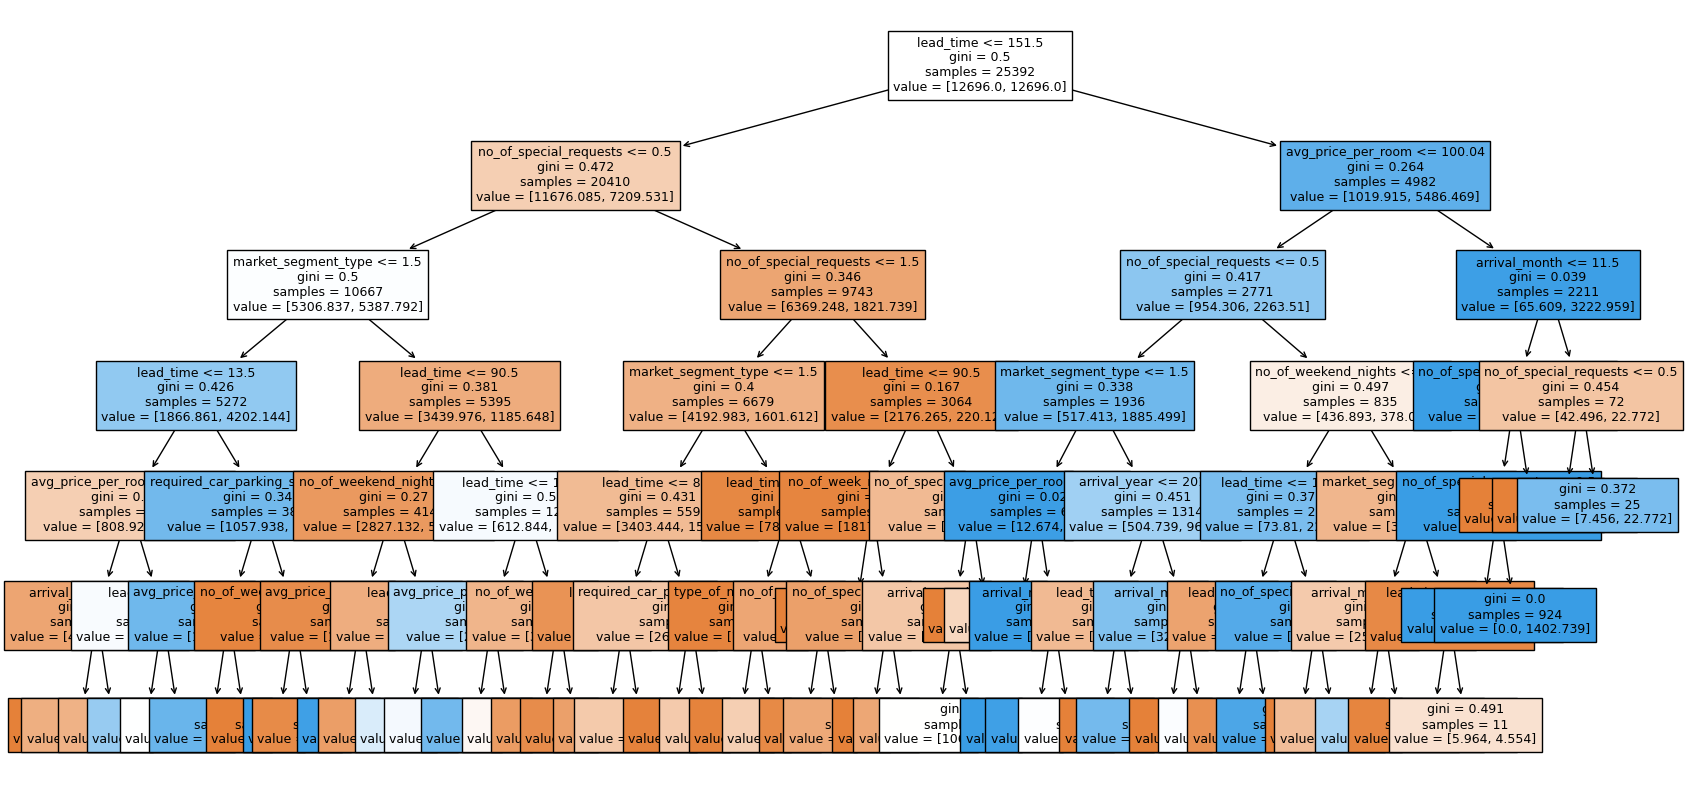

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- avg_price_per_room <= 99.44
|   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |--- weights: [92.45, 0.00] class: 0
|   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |--- weights: [363.83, 132.08] class: 0
|   |   |   |   |--- avg_price_per_room >  99.44
|   |   |   |   |   |--- lead_time <= 3.50
|   |   |   |   |   |   |--- weights: [219.94, 85.01] class: 0
|   |   |   |   |   |--- lead_time >  3.50
|   |   |   |   |   |   |--- weights: [132.71, 280.85] class: 1
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- required_car_parking_space <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 71.92
|   |   |   |   |   |   |--- weights: [158.80, 159.40] class: 1
|   |   |   |   |   |--- avg_price_per_room >  71.92
|   |   |   |   |   |   |--- weights: [850.67, 3543.28] class: 1
|

## Model Performance Comparison and Conclusions

In [ ]:
# Evaluate Logistic Regression model on test data
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, x_test1, y_test)

In [ ]:
# training performance comparison

# Calculate training performance for the initial Decision Tree model
decision_tree_perf_train = model_performance_classification_statsmodels(model, x_train1, y_train)

# Calculate training performance for the tuned Decision Tree model
decision_tree_tune_perf_train = model_performance_classification_statsmodels(estimator, x_train1, y_train)

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        # decision_tree_post_perf_train.T, # This variable is not defined, so I will comment it out
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning - Tuned)",
    # "Decision Tree (Post-Pruning)", # Removing the column name as the variable is commented out
]
print("Training performance comparison:")
print(models_train_comp_df)

Training performance comparison:
           Decision Tree sklearn  Decision Tree (Pre-Pruning - Tuned)
Accuracy                0.993187                             0.826796
Recall                  0.983618                             0.790984
Precision               0.995643                             0.713977
F1                      0.989594                             0.750511


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

I would suggest that the hotel should adopt policies that allow refunds for cancellations that occur at least 2 months before the booking date as this would enchorage the customers to re book for the near future, and cancellations are more likely to occur when the booking is farther out. Something that may also be profitable is giving half of the refund back if the booking is less that 2 months away for the same reasons stated above, and it would allow the hotel to still profit. Giving reacurring customers discounts could also create more business as the average price per room is an important feature driving cancellations of bookings.

### Model performance evaluation for Decision Tree

In [ ]:
# Model performance on the training data
print("Training performance:")
model_performance_classification_statsmodels(model, x_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.993187,0.983618,0.995643,0.989594


In [ ]:
# Model performance on the testing data
print("Test performance:")
model_performance_classification_statsmodels(model, x_test1, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.869337,0.807212,0.792805,0.799944


### Confusion matrix for Decision Tree

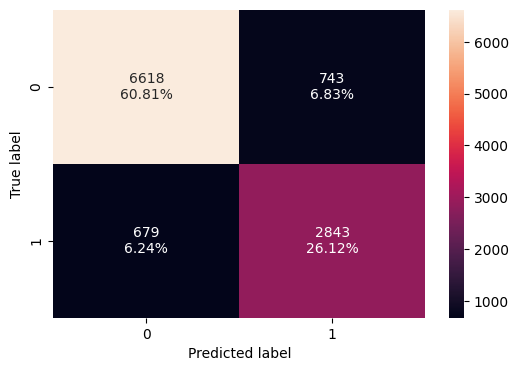

In [ ]:
confusion_matrix_statsmodels(model, x_test1, y_test)

### Comparing Model Performances

In [ ]:
# Compare the performance of Logistic Regression and Decision Tree models
performance_comparison = pd.DataFrame({
    'Logistic Regression': log_reg_model_test_perf.iloc[0],
    'Decision Tree': model_performance_classification_statsmodels(model, x_test1, y_test).iloc[0]
})

print("Model Performance Comparison on Test Data:")
print(performance_comparison)

Model Performance Comparison on Test Data:
           Logistic Regression  Decision Tree
Accuracy              0.805752       0.869337
Recall                0.622942       0.807212
Precision             0.736242       0.792805
F1                    0.674869       0.799944


In [ ]:
%%shell
jupyter nbconvert --to html /content/Project_SLC_DSBA_INNHotels_FullCode.ipynb

[NbConvertApp] Converting notebook /content/Project_SLC_DSBA_INNHotels_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 21 image(s).
[NbConvertApp] Writing 2626217 bytes to /content/Project_SLC_DSBA_INNHotels_FullCode.html
